# Example - 04 - Venus Aerocapture: Part 2

In this example, you will learn to create a drag modulation vehicle object and compute the theoretical corridor width available for drag modulation aerocapture at Venus.

For reference, we will re-create a figure from the paper "Putnam and Braun, Drag-Modulation Flight-Control System Options for Planetary Aerocapture, Journal of Spacecraft and Rockets, Vol. 51, No. 1, 2014. DOI: 10.2514/1.A32589


Import AMAT and required libraries

In [2]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

In [3]:
# Create a planet object
planet=Planet("VENUS")    

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Venus/venus-gram-avg.dat', 0 , 1 ,2, 3)

# The reference paper uses 150 km as entry interface altitude (vs 180 km as pre-defined in AMAT).
# Hence reset planet.h_skip to 150 km
planet.h_skip = 150000.0 
# Create a vehicle object flying in the target planet atmosphere
vehicle=Vehicle('DMVehicle', 1500.0, 50.0, 0.0, 3.1416, 0.0, 0.10, planet)

# Set vehicle conditions at entry interface
# Note that the EFPA initial value is arbitrary. It will be computed and reset later.
vehicle.setInitialState(150.0,0.0,0.0,11.0,0.0,-4.5,0.0,0.0)
vehicle.setSolverParams(1E-6)


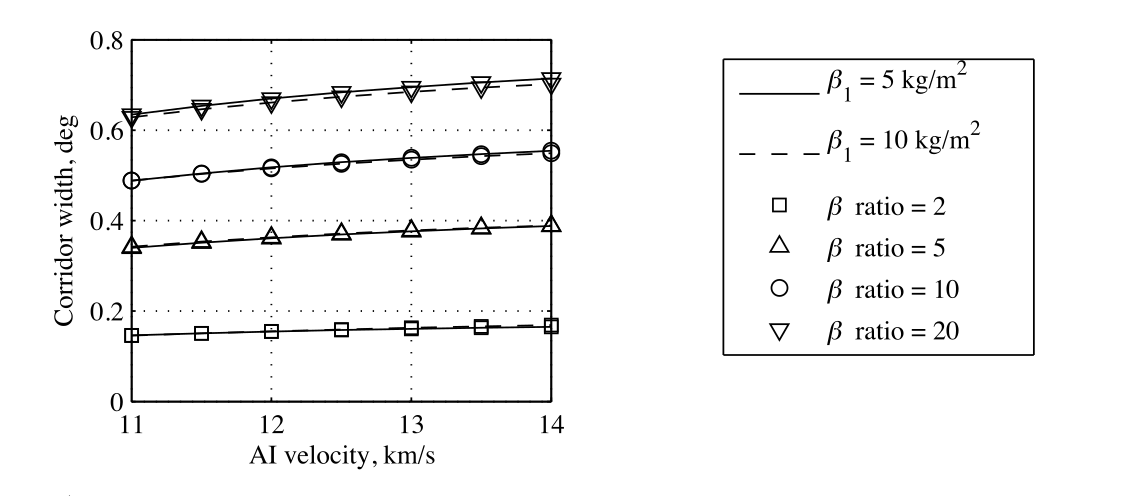

In [4]:
from IPython.display import Image
Image(filename='../plots/putnam-2014-reference.png')

This is the figure that we want to reproduce using AMAT. Let us start setting up the simulation parameters.

In [7]:
# Define the AI velocity and ballistic ratio range
VAI_array = np.linspace(11,14,7)
BR_array  = np.array([2.0,5.0,10.0,20.0])

# NOTE: You will get a FileExistsError if you run this as such. Re-name the directory to something else.

# Create a directory in ../data/ to store the data
os.makedirs('../data/putnamBraun2013')

# Store the speed range and ballistic coefficient range 
np.savetxt('../data/putnamBraun2013/VAI_array.txt',VAI_array)
np.savetxt('../data/putnamBraun2013/BR_array.txt' , BR_array)

# Create two empty matrices to store the TCW values
TCW_array1 = np.zeros((len(VAI_array),len(BR_array))) 
TCW_array2 = np.zeros((len(VAI_array),len(BR_array))) 

# Define the two values for beta_1 used in the paper.
beta11 = 5.0
beta12 = 10.0

In [8]:
# Compute the corridor width values to create the figure.
# NOTE: This calculation will take several minutes.
print('Running beta1=5.0')

for i in range(0,len(VAI_array)):
    for j in range(0,len(BR_array)):
        vehicle.setInitialState(150.0,0.0,0.0,VAI_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setDragModulationVehicleParams(beta11,BR_array[j])
        TCW_array1[i,j] = vehicle.computeTCWD(2400.0, 0.1,-80.0,-4.0,1E-10,400.0)
        print('VAI: '+str(VAI_array[i])+' km/s, BETA RATIO: '+str(BR_array[j])+' TCW: '+str(TCW_array1[i,j])+' deg.')

np.savetxt('../data/putnamBraun2013/TCW_array1.txt', TCW_array1)

print('Running beta1=10.0')
for i in range(0,len(VAI_array)):
    for j in range(0,len(BR_array)):
        vehicle.setInitialState(150.0,0.0,0.0,VAI_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setDragModulationVehicleParams(beta12,BR_array[j])
        TCW_array2[i,j] = vehicle.computeTCWD(2400.0, 0.1,-80.0,-4.0,1E-10,400.0)
        print('VAI: '+str(VAI_array[i])+' km/s, BETA RATIO: '+str(BR_array[j])+' TCW: '+str(TCW_array2[i,j])+' deg.')

np.savetxt('../data/putnamBraun2013/TCW_array2.txt', TCW_array2)
print('Done!')


Running beta1=5.0
VAI: 11.0 km/s, BETA RATIO: 20.0 TCW: 0.6330942395761667 deg.
VAI: 14.0 km/s, BETA RATIO: 20.0 TCW: 0.7133574859435612 deg.
Running beta1=10.0
VAI: 11.0 km/s, BETA RATIO: 20.0 TCW: 0.6273882169480203 deg.
VAI: 14.0 km/s, BETA RATIO: 20.0 TCW: 0.7018732332253421 deg.
Done!


Load the data and make the plot.

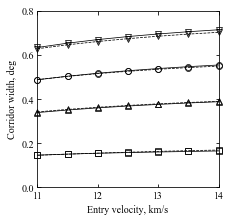

In [9]:

VAI_array  = np.loadtxt('../data/putnamBraun2013/VAI_array.txt')
BR_array   = np.loadtxt('../data/putnamBraun2013/BR_array.txt')
TCW_array1 = np.loadtxt('../data/putnamBraun2013/TCW_array1.txt')
TCW_array2 = np.loadtxt('../data/putnamBraun2013/TCW_array2.txt')

fig = plt.figure()
fig.set_size_inches([3.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.plot(VAI_array, TCW_array1[:,0], linestyle='-', linewidth=0.75, marker='s',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)
plt.plot(VAI_array, TCW_array1[:,1], linestyle='-', linewidth=0.75, marker='^',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)
plt.plot(VAI_array, TCW_array1[:,2], linestyle='-', linewidth=0.75, marker='o',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)
plt.plot(VAI_array, TCW_array1[:,3], linestyle='-', linewidth=0.75, marker='v',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)

plt.plot(VAI_array, TCW_array2[:,0], linestyle='--', linewidth=0.75, marker='s',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)
plt.plot(VAI_array, TCW_array2[:,1], linestyle='--', linewidth=0.75, marker='^',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)
plt.plot(VAI_array, TCW_array2[:,2], linestyle='--', linewidth=0.75, marker='o',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)
plt.plot(VAI_array, TCW_array2[:,3], linestyle='--', linewidth=0.75, marker='v',ms=6, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.75, color='black', clip_on=False)

plt.xlabel('Entry velocity, km/s', fontsize=10)
plt.ylabel('Corridor width, deg',fontsize=10)
plt.yticks(np.arange(0, 0.9, step=0.2))
plt.xticks(np.arange(11.0, 14.5, step=1.0))

plt.xlim([11.0,14.0])
plt.ylim([0.0,  0.8])

ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)


plt.savefig('../plots/putnam-braun-2013.png',bbox_inches='tight')
plt.savefig('../plots/putnam-braun-2013.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/putnam-braun-2013.eps', dpi=300,bbox_inches='tight')

plt.show()

The plots are now saved in plots/putnam-braun-* and should match with the results from the paper.

**Congratulations!** You have now computed the corridor widths for a drag modulation aerocapture vehicle at Venus. In the next example, we will create an aerocapture feasibility chart for Titan.